<a href="https://colab.research.google.com/github/nicolasquant/inteligencia_artificial/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
y = y real
y_chapeu = y calculado a partir da função de ativação
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

""" PARTE 0 - TRATAMENTO DE DADOS"""

iris = datasets.load_iris()

dados = iris["data"]
y = iris["target"]

indices = np.where((y == 0) | (y == 2))
dados = dados[indices]
y = y[indices]

y = np.where(y == 2, 1, 0)

''' PARTE 0.1 - SEPARAÇÃO DOS DADOS DE TESTE E DADOS DE VALIDAÇÃO'''

dados_train, dados_test, y_train, y_test = train_test_split(dados, y, test_size=0.2, random_state=42)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

''' 0.2 NORMALIZAÇÃO DOS DADOS PARA MELHOR PREDIÇÃO E DESEMPENHO DO MODELO'''

scaler = StandardScaler()
dados_train = scaler.fit_transform(dados_train)
dados_test = scaler.fit_transform(dados_test)

''' PARTE 0.3 - DEFINIÇÃO DAS CONSTANTES'''

eta = .01 # coef de aprendizado
np.random.seed(42) # padronização na aleatoriedade
weights = np.random.randn(len(dados[0]))
bias = np.random.randn()
print(weights, bias)


[ 0.49671415 -0.1382643   0.64768854  1.52302986] -0.23415337472333597


In [ ]:
""" PARTE 1 - CALCULANDO Z"""

def Z_(dados_train,weights,bias):
    xw_soma = np.dot(dados_train,weights)
    z = xw_soma + bias
    return z

In [ ]:
''' PARTE 1.1 - CRIANDO UMA FUNÇÃO GRÁFICA PARA PLOTAR NOSSO MODELO DE APRENDIZADO DE FORMA VISUAL'''
def plot_decision_boundary(X, y, model_weights, model_bias, indice_f1=0, indice_f2=1): # só pra plotar a área vermelha e a azul - CHAT GPT QUE ME EXPLIQUE ISSO, EU NÃO SEI NADA SOBRE ESSE CÓDIGO DE GERAÇÃO DOS GRÁFICOS
    """
    Plota o limite de decisão para um modelo de classificação binária junto com os dados de entrada.

    :param X: Matriz de características dos dados de entrada.
    :param y: Vetor de rótulos verdadeiros (classes).
    :param model_weights: Vetor de pesos do modelo de classificação.
    :param model_bias: Bias do modelo de classificação.
    :param indice_f1: Índice da primeira característica a ser usada no plot (padrão é 0).
    :param indice_f2: Índice da segunda característica a ser usada no plot (padrão é 1).
    """
    # Definir os limites do gráfico
    x_min, x_max = X[:, indice_f1].min() - 0.5, X[:, indice_f1].max() + 0.5
    y_min, y_max = X[:, indice_f2].min() - 0.5, X[:, indice_f2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predizer para cada ponto no meshgrid
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], model_weights) + model_bias)
    Z = Z.reshape(xx.shape)

    # Contorno e preenchimento
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3), cmap=plt.cm.coolwarm)
    plt.colorbar()

    # Plotar os pontos de dados
    plt.scatter(X[:, indice_f1], X[:, indice_f2], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel(f'{iris.feature_names[indice_f1]}')
    plt.ylabel(f'{iris.feature_names[indice_f2]}')

In [ ]:
""" PARTE 2 - CRIANDO A FUNÇÃO DE ATIVAÇÃO  """

def sigmoid(z_de_k):
  return 1/(1 + 1/np.exp(z_de_k))

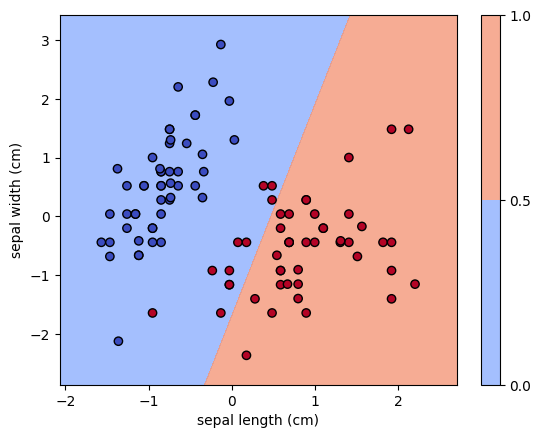

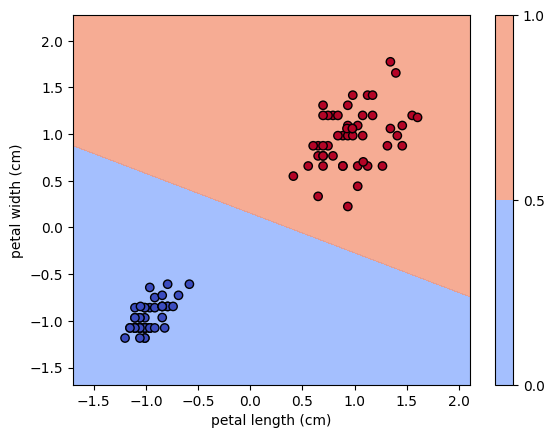

In [ ]:
''' PARTE 2.1 - PLOTANDO NOSSO MODELO SEM O TREINAMENTO APÓS A DEFINIÇÃO DOS PESOS E BIAS ALEATÓRIOS'''

# Combina treino e teste para plotagem
X_combined = np.vstack((dados_train, dados_test))
y_combined = np.hstack((y_train, y_test))

# Dados do modelo (hipotético)
model_weights = np.array([weights[0],  weights[1]])  # Substitua por seus pesos reais
model_bias = bias                   # Substitua pelo seu viés real
# Plotar a fronteira de decisão e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[2],  weights[3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()

In [ ]:
""" PARTE 3 - FUNÇÃO CUSTO """

def erro_quadratico_medio(y_chapeu, y): # y e y_chapeu são matrizes - essa função também é chamada de MSE (minimum square error)
  return np.mean((y_chapeu - y)**2)


In [ ]:
""" PARTE 4 - BACKPROPAGATION (ATUALIZAÇÃO DOS PESOS E BIAS - CRIANDO O APRENDIZADO) """

def derivada_sigmoide(z):
    """
    Derivada da Função Sigmóide.

    """
    s = sigmoid(z)
    return s * (1 - s)

def derivada_MSE(y_chapeu, y):
    """
    Derivada do Erro Quadrático Médio.

    :param y_chapeu: Vetor de predições do modelo.
    :param y: Vetor de valores verdadeiros.
    :return: Valor da média das derivadas do erro quadrático médio.
    """
    return np.mean(2*(y_chapeu - y))

derivadaZ = dados_train
valores_dos_MSE = []
for _ in range(100): # faremos 100 épocas
  y_chapeu = []
  Z = []
  Z = Z_(dados_train,weights,bias) # Etapa 3
  y_chapeu.append(sigmoid(Z)) # Etapa 4
  MSE = erro_quadratico_medio(y_chapeu, y_train) # Etapa 5.1
  valores_dos_MSE.append(MSE)

  # Começando o backpropagation
  d_MSE = derivada_MSE(y_chapeu, y_train) # Etapa 5.2
  d_sigmoid = derivada_sigmoide(Z)
  d_weights = d_MSE*np.dot(derivadaZ.T,d_sigmoid)
  weights -= eta*d_weights # Etapa 5.3 - atualização dos pesos e e bias
  d_bias = d_MSE*np.sum(d_sigmoid)
  bias -= eta*d_bias

# a partir do aprendizado, atualizamos todos os pesos. com isso, faremos o todos os cálculos novamente, porém, agora, com os novos pesos para ver se nossa Loss function diminui e nosso y_chapeu se aproximou do nosso y
print(weights,bias)

[ 0.50559003 -0.2040866   0.69216305  1.56632814] 0.019048293438385478


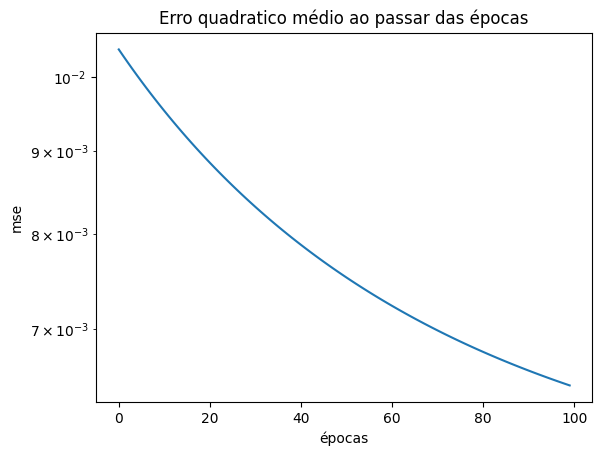

In [ ]:
plt.plot(valores_dos_MSE)
plt.title('Erro quadratico médio ao passar das épocas')
plt.yscale('log')
plt.ylabel('mse')
plt.xlabel('épocas')
plt.show()

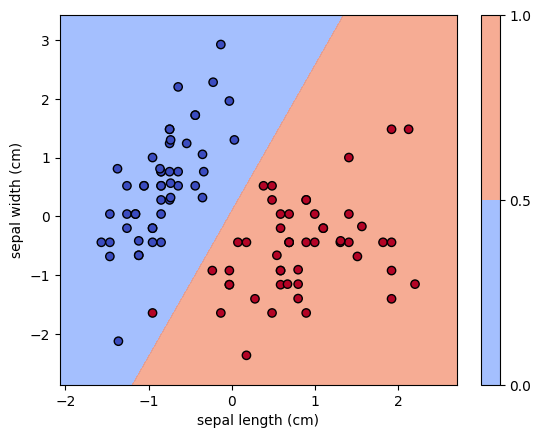

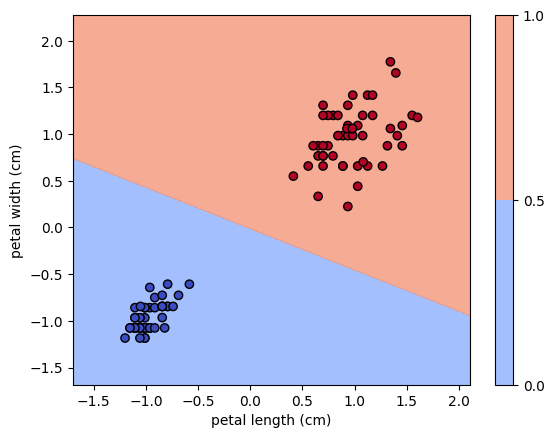

In [ ]:
''' PARTE 5 - TESTANDO NOSSOS NOVOS PESOS NOS NOSSOS DADOS TESTE'''

# Combina treino e teste para plotagem
X_combined = np.vstack((dados_train, dados_test))
y_combined = np.hstack((y_train, y_test))


# Dados do modelo (hipotético)
model_weights = np.array([ weights[0],  weights[1]])  # Substitua por seus pesos reais
model_bias = bias                   # Substitua pelo seu viés real
# Plotar a fronteira de decisão e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias, indice_f1=0, indice_f2=1)
plt.show()

model_weights = np.array([ weights[2],  weights[3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()
